In [10]:
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
import numpy as np
random.seed(0)

import pandas as pd
dataset = fetch_california_housing()
train, target = pd.DataFrame(dataset.data), pd.DataFrame(dataset.target)
train.columns = ['0','1','2','3','4','5','6','7']
train.insert(loc=len(train.columns), column='target', value=target)

/Users/FY/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


max count: 2 - value: 5.000000
max-1 count: 2 - value: 4.000000


/Users/FY/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Mean of feature 0 (start): 5.429
Median of feature 0 (start): 5.229


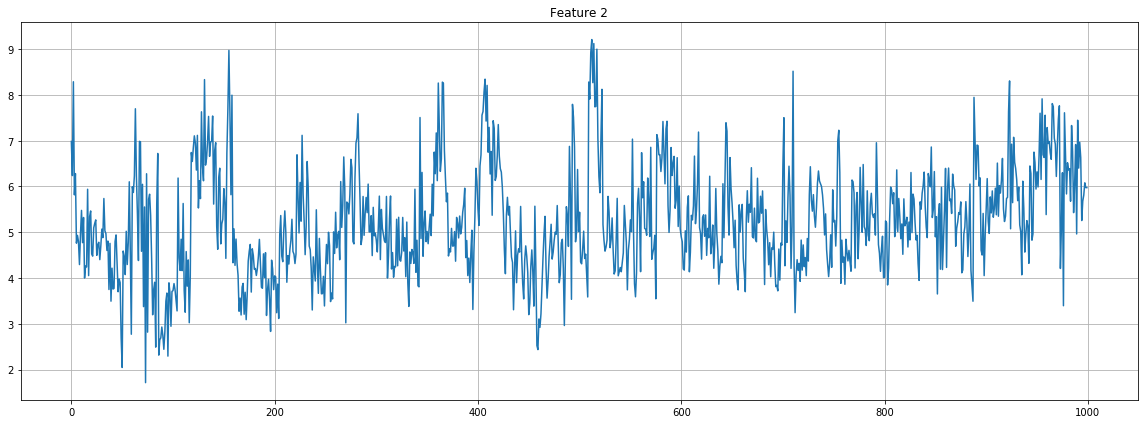

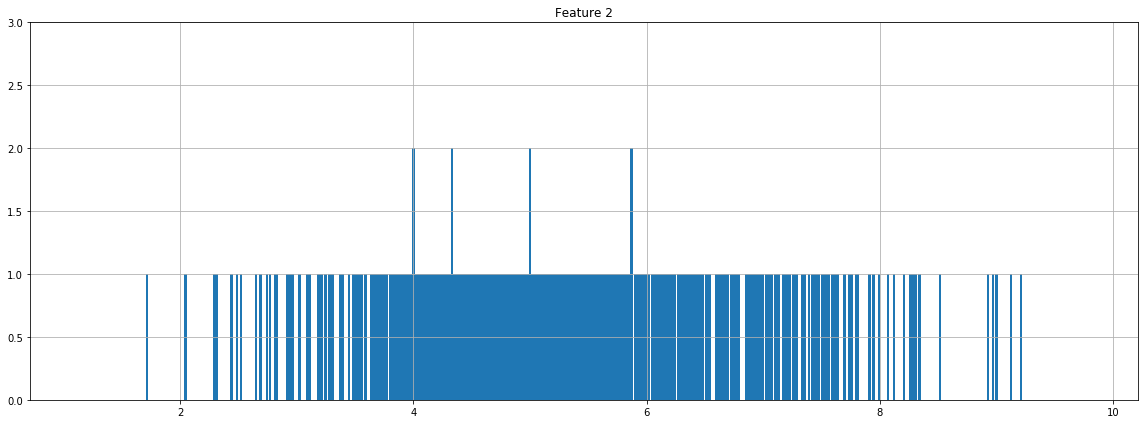

In [14]:
def graph_feat(feat, data, stop=None):
    fig = plt.figure(figsize=(16, 6))
    plt.title('Feature %s' % str(feat))
    if isinstance(data, np.ndarray):
        d = data[:, feat]
    else:
        d = data[feat]
    stop = d.shape[0] if stop is None else stop
    plt.plot(d[:stop])
    plt.grid(True)
    plt.tight_layout()
    fig.show()

def graph_hist_feat(feat, data, stop=None):
    fig = plt.figure(figsize=(16, 6))
    plt.title('Feature %s' % str(feat))
    if isinstance(data, np.ndarray):   #is 'data' a 'np.ndarray'?
        d = data[:, feat]
    else:
        d = data[feat]
    stop = d.shape[0] if stop is None else stop
    bins, count = np.unique(d[:stop], return_counts=True)
    pos = np.argsort(count)
    print('max count: %d - value: %f' % (count[pos[-1]], bins[pos[-1]]))
    print('max-1 count: %d - value: %f' % (count[pos[-2]], bins[pos[-2]]))
    plt.bar(bins, count, width=.02)
    plt.ylim(0, count[pos[-1]] + 1)
    plt.xlim(bins[0] - 1, bins[-1] + 1)
    plt.grid(True)
    plt.tight_layout()
    fig.show()

col_nb = 2
stop = 1000
graph_feat(str(col_nb), train, stop)
graph_hist_feat(str(col_nb), train, stop)
print('Mean of feature 0 (start): %.3f' % np.nanmean(train[str(col_nb)]))
print('Median of feature 0 (start): %.3f' % np.nanmedian(train[str(col_nb)]))

/Users/FY/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


Mean of feature 0 (added NaN): 5.449
Median of feature 0 (added NaN): 5.236


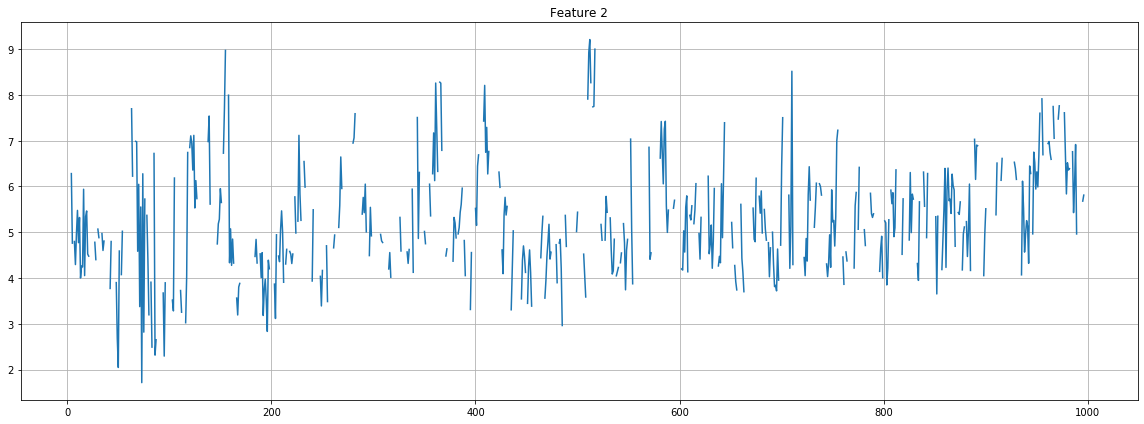

In [3]:
train_nan = train.copy(deep=True)
column = train_nan[str(col_nb)]
missing_pct = int(column.size * .4)
perm = np.random.permutation(column.size)
column[perm[:missing_pct]] = np.NaN

graph_feat(str(col_nb), train_nan, stop)
print('Mean of feature 0 (added NaN): %.3f' % np.nanmean(train_nan[str(col_nb)]))
print('Median of feature 0 (added NaN): %.3f' % np.nanmedian(train_nan[str(col_nb)]))

Mean of feature 0 (imputed): 5.449


/Users/FY/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


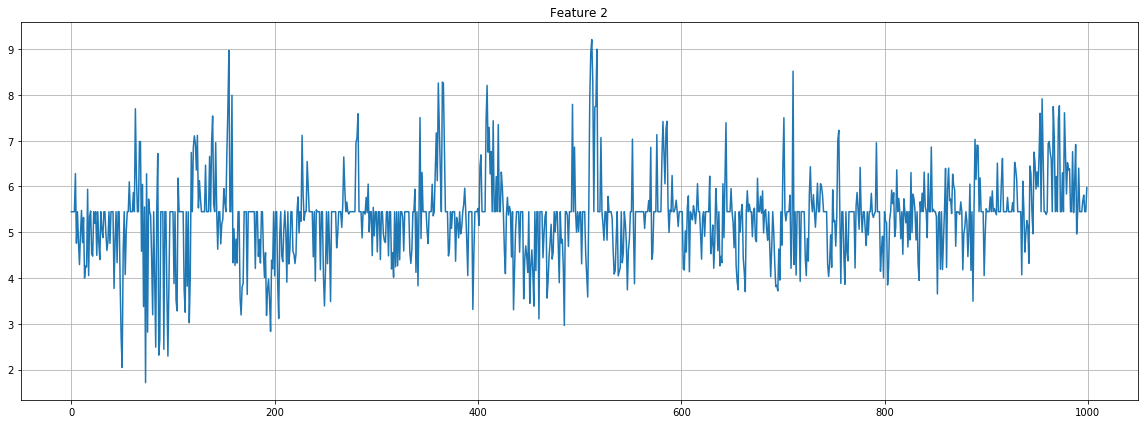

In [4]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean').fit(train_nan)
imp_train = imp.transform(train_nan)

print('Mean of feature 0 (imputed): %.3f' % np.nanmean(imp_train[:, col_nb]))
graph_feat(col_nb, imp_train, stop)

Median of feature 0 (imputed): 5.236


/Users/FY/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


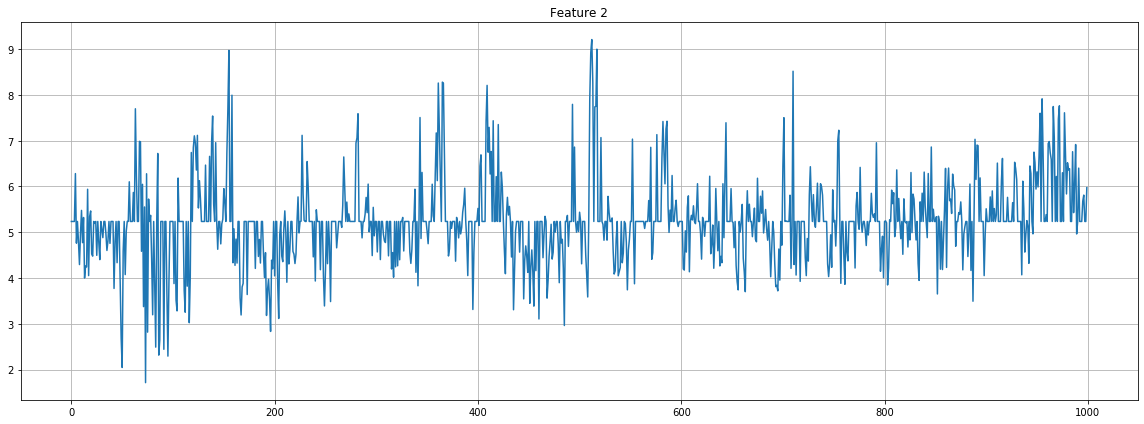

In [5]:
imp = SimpleImputer(strategy='median').fit(train_nan)
imp_train = imp.transform(train_nan)

print('Median of feature 0 (imputed): %.3f' % np.nanmedian(imp_train[:, col_nb]))
graph_feat(col_nb, imp_train, stop)

Mean of feature 0 (imputed): 3.269
Median of feature 0 (imputed): 4.136


/Users/FY/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


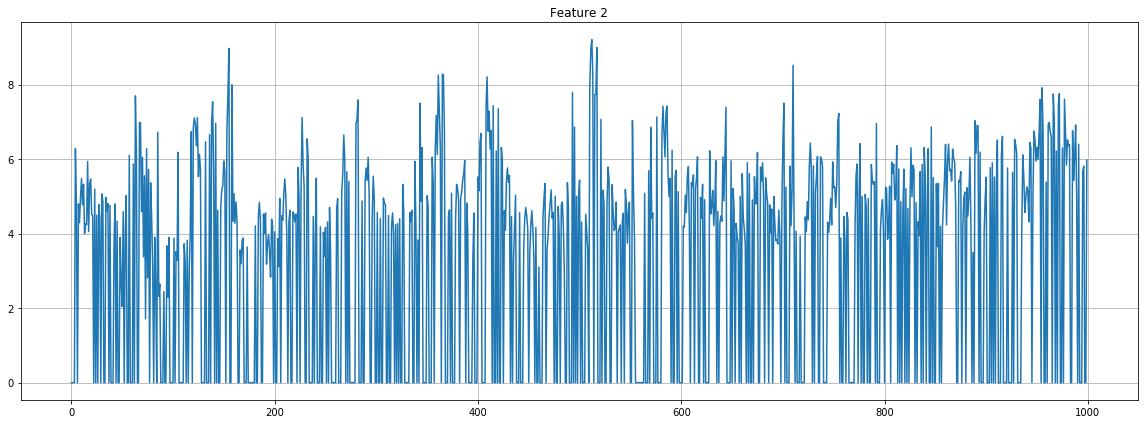

In [6]:
imp = SimpleImputer(strategy='constant', fill_value=0).fit(train_nan)
imp_train = imp.transform(train_nan)

print('Mean of feature 0 (imputed): %.3f' % np.nanmean(imp_train[:, col_nb]))
print('Median of feature 0 (imputed): %.3f' % np.nanmedian(imp_train[:, col_nb]))
graph_feat(col_nb, imp_train, stop)

Mean of feature 0 (imputed): 5.669
Median of feature 0 (imputed): 6.000


/Users/FY/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


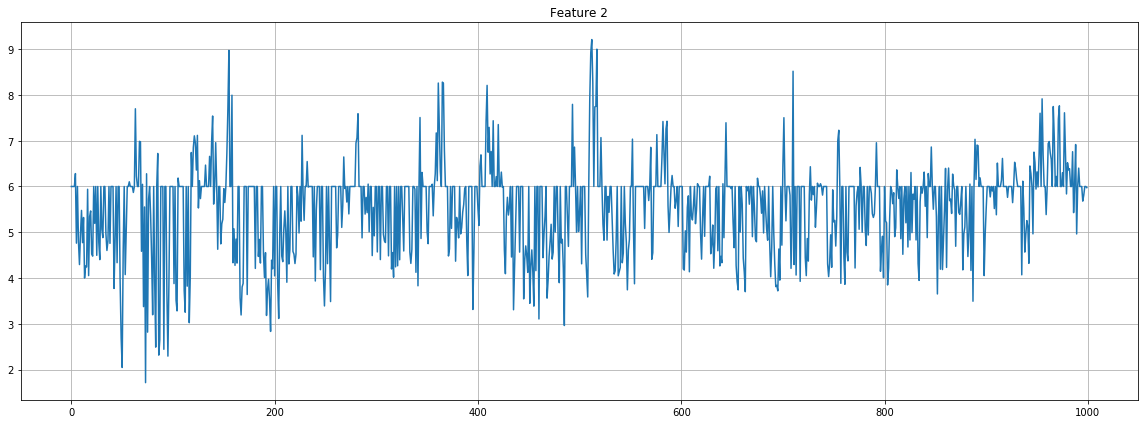

In [7]:
imp = SimpleImputer(strategy='most_frequent').fit(train_nan)
imp_train = imp.transform(train_nan)

print('Mean of feature 0 (imputed): %.3f' % np.nanmean(imp_train[:, col_nb]))
print('Median of feature 0 (imputed): %.3f' % np.nanmedian(imp_train[:, col_nb]))
graph_feat(col_nb, imp_train, stop)

# **What about interpolation?**

In [0]:
# 